In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
# Set the stock data directory (relative path)
stock_data_dir = "../data/stock_prices/"  # Adjust if needed
output_dir = "../output/"  # Output directory for saved plots

In [12]:
# Function to load stock data
def load_stock_data(directory):
    stock_data = {}  # Initialize empty dictionary
    for file_name in os.listdir(directory):
        if file_name.endswith("_data.csv"):
            stock_symbol = file_name.split("_")[0]  # Extract stock symbol
            file_path = os.path.join(directory, file_name)
            try:
                stock_df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
                stock_data[stock_symbol] = stock_df
                print(f"Successfully loaded data for {stock_symbol}")
            except Exception as e:
                print(f"Error loading data for {stock_symbol}: {e}")
    return stock_data

In [13]:
# Function to calculate Simple Moving Average (SMA)
def simple_moving_average(data, period):
    return data['Close'].rolling(window=period).mean()

In [15]:
# Function to calculate Exponential Moving Average (EMA)
def exponential_moving_average(data, period):
    return data['Close'].ewm(span=period, adjust=False).mean()

In [16]:
# Function to calculate Relative Strength Index (RSI)
def relative_strength_index(data, period=14):
    delta = data['Close'].diff()  # Changes in consecutive closing prices
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()  # Average gain
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()  # Average loss
    rs = gain / loss  # Relative strength
    return 100 - (100 / (1 + rs))  # RSI calculation

In [7]:
# Function to calculate Moving Average Convergence Divergence (MACD)
def moving_average_convergence_divergence(data, short_period=12, long_period=26, signal_period=9):
    ema_short = exponential_moving_average(data, short_period)  # Short period EMA
    ema_long = exponential_moving_average(data, long_period)  # Long period EMA
    macd = ema_short - ema_long  # MACD line
    signal = macd.ewm(span=signal_period, adjust=False).mean()  # Signal line
    return macd, signal

In [8]:
# Function to plot technical indicators and save plots
def plot_technical_indicators(data, stock_symbol):
    fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    # Plot closing prices and moving averages
    ax[0].plot(data['Close'], label='Closing Price', color='b')
    ax[0].plot(simple_moving_average(data, 50), label='SMA (50)', linestyle='--', color='g')
    ax[0].plot(exponential_moving_average(data, 50), label='EMA (50)', linestyle='--', color='r')
    ax[0].set_title("Closing Price and Moving Averages")
    ax[0].legend()

    # Plot RSI
    ax[1].plot(relative_strength_index(data), label='RSI (14)')
    ax[1].axhline(70, color='r', linestyle='--', label='Overbought')
    ax[1].axhline(30, color='g', linestyle='--', label='Oversold')
    ax[1].set_title("Relative Strength Index (RSI)")
    ax[1].legend()

    # Plot MACD and signal line
    macd, signal = moving_average_convergence_divergence(data)
    ax[2].plot(macd, label='MACD', color='orange')
    ax[2].plot(signal, label='Signal Line', color='blue')
    ax[2].set_title("Moving Average Convergence Divergence (MACD)")
    ax[2].legend()

    # Save the plot to a file
    plt.tight_layout()
    plot_path = f"../output/{stock_symbol}_technical_indicators.png"
    plt.savefig(plot_path)
    plt.show()
    print(f"Plot saved to {plot_path}")

Successfully loaded data for AAC
Successfully loaded data for AADR
Successfully loaded data for AAL
Successfully loaded data for AAMC
Successfully loaded data for AAME
Successfully loaded data for AAN
Successfully loaded data for AAOI
Successfully loaded data for AAON
Successfully loaded data for AAPL
Successfully loaded data for AAP
Successfully loaded data for AAU
Successfully loaded data for AAVL
Successfully loaded data for AAV
Successfully loaded data for AAWW
Successfully loaded data for AAXJ
Successfully loaded data for AA
Successfully loaded data for ABAC
Successfully loaded data for ABAX
Successfully loaded data for ABBV
Successfully loaded data for ABB
Successfully loaded data for ABCB
Successfully loaded data for ABCD
Successfully loaded data for ABCO
Successfully loaded data for ABCW
Successfully loaded data for ABC
Successfully loaded data for ABDC
Successfully loaded data for ABEV
Successfully loaded data for ABGB
Successfully loaded data for ABG
Successfully loaded data 

Successfully loaded data for AMJ
Successfully loaded data for AMKR
Successfully loaded data for AMNB
Successfully loaded data for AMOT
Successfully loaded data for AMOV
Successfully loaded data for AMPE
Successfully loaded data for AMPH
Successfully loaded data for AMPS
Successfully loaded data for AMP
Successfully loaded data for AMRB
Successfully loaded data for AMRC
Successfully loaded data for AMRE
Successfully loaded data for AMRI
Successfully loaded data for AMRK
Successfully loaded data for AMRN
Successfully loaded data for AMRS
Successfully loaded data for AMSC
Successfully loaded data for AMSG
Successfully loaded data for AMSWA
Successfully loaded data for AMTD
Successfully loaded data for AMTG
Successfully loaded data for AMTX
Successfully loaded data for AMT
Successfully loaded data for AMWD
Successfully loaded data for AMX
Successfully loaded data for AMZA
Successfully loaded data for AMZG
Successfully loaded data for AMZN
Successfully loaded data for AM
Successfully loaded

Successfully loaded data for BAC
Successfully loaded data for BAF
Successfully loaded data for BAGR
Successfully loaded data for BAH
Successfully loaded data for BAK
Successfully loaded data for BALT
Successfully loaded data for BAL
Successfully loaded data for BAMM
Successfully loaded data for BAM
Successfully loaded data for BANC
Successfully loaded data for BANF
Successfully loaded data for BANR
Successfully loaded data for BANX
Successfully loaded data for BAP
Successfully loaded data for BAR
Successfully loaded data for BASI
Successfully loaded data for BAS
Successfully loaded data for BAX
Successfully loaded data for BA
Successfully loaded data for BBBY
Successfully loaded data for BBCN
Successfully loaded data for BBC
Successfully loaded data for BBDO
Successfully loaded data for BBD
Successfully loaded data for BBF
Successfully loaded data for BBGI
Successfully loaded data for BBG
Successfully loaded data for BBH
Successfully loaded data for BBK
Successfully loaded data for BBL

Successfully loaded data for BSMX
Successfully loaded data for BSPM
Successfully loaded data for BSQR
Successfully loaded data for BSRR
Successfully loaded data for BSTC
Successfully loaded data for BST
Successfully loaded data for BSX
Successfully loaded data for BTA
Successfully loaded data for BTE
Successfully loaded data for BTG
Successfully loaded data for BTI
Successfully loaded data for BTN
Successfully loaded data for BTT
Successfully loaded data for BTUI
Successfully loaded data for BTU
Successfully loaded data for BTX
Successfully loaded data for BT
Successfully loaded data for BUD
Successfully loaded data for BUI
Successfully loaded data for BUNL
Successfully loaded data for BUNT
Successfully loaded data for BURL
Successfully loaded data for BUSE
Successfully loaded data for BVA
Successfully loaded data for BVN
Successfully loaded data for BVSN
Successfully loaded data for BVX
Successfully loaded data for BV
Successfully loaded data for BWA
Successfully loaded data for BWC
S

Successfully loaded data for CHRW
Successfully loaded data for CHSCM
Successfully loaded data for CHSCN
Successfully loaded data for CHSCO
Successfully loaded data for CHSCP
Successfully loaded data for CHSP
Successfully loaded data for CHS
Successfully loaded data for CHTR
Successfully loaded data for CHT
Successfully loaded data for CHU
Successfully loaded data for CHW
Successfully loaded data for CHXF
Successfully loaded data for CHYR
Successfully loaded data for CHY
Successfully loaded data for CH
Successfully loaded data for CIA
Successfully loaded data for CIB
Successfully loaded data for CIDM
Successfully loaded data for CIEN
Successfully loaded data for CIE
Successfully loaded data for CIFC
Successfully loaded data for CIF
Successfully loaded data for CIG
Successfully loaded data for CII
Successfully loaded data for CIK
Successfully loaded data for CIMT
Successfully loaded data for CINF
Successfully loaded data for CIO
Successfully loaded data for CIR
Successfully loaded data f

Successfully loaded data for CSIQ
Successfully loaded data for CSJ
Successfully loaded data for CSLT
Successfully loaded data for CSL
Successfully loaded data for CSM
Successfully loaded data for CSOD
Successfully loaded data for CSPI
Successfully loaded data for CSQ
Successfully loaded data for CSRE
Successfully loaded data for CSS
Successfully loaded data for CSTE
Successfully loaded data for CST
Successfully loaded data for CSUN
Successfully loaded data for CSV
Successfully loaded data for CSX
Successfully loaded data for CS
Successfully loaded data for CTAS
Successfully loaded data for CTBI
Successfully loaded data for CTCT
Successfully loaded data for CTF
Successfully loaded data for CTG
Successfully loaded data for CTHR
Successfully loaded data for CTIB
Successfully loaded data for CTLT
Successfully loaded data for CTL
Successfully loaded data for CTNN
Successfully loaded data for CTO
Successfully loaded data for CTRE
Successfully loaded data for CTRL
Successfully loaded data for

Successfully loaded data for DMF
Successfully loaded data for DMLP
Successfully loaded data for DMND
Successfully loaded data for DMO
Successfully loaded data for DMRC
Successfully loaded data for DM
Successfully loaded data for DNBF
Successfully loaded data for DNB
Successfully loaded data for DNKN
Successfully loaded data for DNL
Successfully loaded data for DNN
Successfully loaded data for DNOW
Successfully loaded data for DNO
Successfully loaded data for DNP
Successfully loaded data for DNR
Successfully loaded data for DOC
Successfully loaded data for DOD
Successfully loaded data for DOG
Successfully loaded data for DOL
Successfully loaded data for DOM
Successfully loaded data for DON
Successfully loaded data for DOOR
Successfully loaded data for DOO
Successfully loaded data for DOVR
Successfully loaded data for DOV
Successfully loaded data for DOW
Successfully loaded data for DOX
Successfully loaded data for DO
Successfully loaded data for DPK
Successfully loaded data for DPLO
Suc

Successfully loaded data for EMF
Successfully loaded data for EMHY
Successfully loaded data for EMIF
Successfully loaded data for EMI
Successfully loaded data for EMJ
Successfully loaded data for EMLP
Successfully loaded data for EML
Successfully loaded data for EMMS
Successfully loaded data for EMN
Successfully loaded data for EMO
Successfully loaded data for EMQQ
Successfully loaded data for EMQ
Successfully loaded data for EMR
Successfully loaded data for EMSA
Successfully loaded data for EMXX
Successfully loaded data for ENBL
Successfully loaded data for ENB
Successfully loaded data for ENDP
Successfully loaded data for ENFC
Successfully loaded data for ENFR
Successfully loaded data for ENGN
Successfully loaded data for ENG
Successfully loaded data for ENH
Successfully loaded data for ENI
Successfully loaded data for ENLC
Successfully loaded data for ENLK
Successfully loaded data for ENL
Successfully loaded data for ENOC
Successfully loaded data for ENOR
Successfully loaded data fo

Successfully loaded data for FCF
Successfully loaded data for FCG
Successfully loaded data for FCHI
Successfully loaded data for FCH
Successfully loaded data for FCLF
Successfully loaded data for FCNCA
Successfully loaded data for FCN
Successfully loaded data for FCOM
Successfully loaded data for FCOR
Successfully loaded data for FCO
Successfully loaded data for FCSC
Successfully loaded data for FCS
Successfully loaded data for FCT
Successfully loaded data for FCX
Successfully loaded data for FDD
Successfully loaded data for FDEF
Successfully loaded data for FDIS
Successfully loaded data for FDI
Successfully loaded data for FDL
Successfully loaded data for FDML
Successfully loaded data for FDM
Successfully loaded data for FDN
Successfully loaded data for FDO
Successfully loaded data for FDP
Successfully loaded data for FDS
Successfully loaded data for FDTS
Successfully loaded data for FDUS
Successfully loaded data for FDX
Successfully loaded data for FEIC
Successfully loaded data for F

Successfully loaded data for FXC
Successfully loaded data for FXD
Successfully loaded data for FXF
Successfully loaded data for FXG
Successfully loaded data for FXH
Successfully loaded data for FXI
Successfully loaded data for FXL
Successfully loaded data for FXN
Successfully loaded data for FXO
Successfully loaded data for FXP
Successfully loaded data for FXR
Successfully loaded data for FXSG
Successfully loaded data for FXS
Successfully loaded data for FXY
Successfully loaded data for FXZ
Successfully loaded data for FYC
Successfully loaded data for FYLD
Successfully loaded data for F
Successfully loaded data for GAA
Successfully loaded data for GABC
Successfully loaded data for GAB
Successfully loaded data for GAIA
Successfully loaded data for GAINO
Successfully loaded data for GAIN
Successfully loaded data for GAI
Successfully loaded data for GALE
Successfully loaded data for GALTU
Successfully loaded data for GALT
Successfully loaded data for GAL
Successfully loaded data for GAM
S

Successfully loaded data for GURX
Successfully loaded data for GUR
Successfully loaded data for GUT
Successfully loaded data for GVAL
Successfully loaded data for GVA
Successfully loaded data for GVI
Successfully loaded data for GVP
Successfully loaded data for GWB
Successfully loaded data for GWGH
Successfully loaded data for GWL
Successfully loaded data for GWPH
Successfully loaded data for GWRE
Successfully loaded data for GWR
Successfully loaded data for GWW
Successfully loaded data for GWX
Successfully loaded data for GXC
Successfully loaded data for GXF
Successfully loaded data for GXG
Successfully loaded data for GXP
Successfully loaded data for GYEN
Successfully loaded data for GY
Successfully loaded data for GZT
Successfully loaded data for G
Successfully loaded data for HABT
Successfully loaded data for HACK
Successfully loaded data for HAE
Successfully loaded data for HAFC
Successfully loaded data for HAIN
Successfully loaded data for HALL
Successfully loaded data for HALO
S

Successfully loaded data for IAT
Successfully loaded data for IAU
Successfully loaded data for IBB
Successfully loaded data for IBCA
Successfully loaded data for IBCC
Successfully loaded data for IBCP
Successfully loaded data for IBIO
Successfully loaded data for IBKC
Successfully loaded data for IBKR
Successfully loaded data for IBLN
Successfully loaded data for IBM
Successfully loaded data for IBND
Successfully loaded data for IBN
Successfully loaded data for IBOC
Successfully loaded data for IBP
Successfully loaded data for IBTX
Successfully loaded data for ICAD
Successfully loaded data for ICA
Successfully loaded data for ICB
Successfully loaded data for ICCC
Successfully loaded data for ICD
Successfully loaded data for ICEL
Successfully loaded data for ICE
Successfully loaded data for ICFI
Successfully loaded data for ICF
Successfully loaded data for ICI
Successfully loaded data for ICLD
Successfully loaded data for ICLN
Successfully loaded data for ICLR
Successfully loaded data f

Successfully loaded data for ITT
Successfully loaded data for ITUB
Successfully loaded data for ITW
Successfully loaded data for IT
Successfully loaded data for IUSB
Successfully loaded data for IUSG
Successfully loaded data for IUSV
Successfully loaded data for IVAC
Successfully loaded data for IVAL
Successfully loaded data for IVAN
Successfully loaded data for IVC
Successfully loaded data for IVE
Successfully loaded data for IVH
Successfully loaded data for IVOP
Successfully loaded data for IVR
Successfully loaded data for IVV
Successfully loaded data for IVW
Successfully loaded data for IVZ
Successfully loaded data for IWB
Successfully loaded data for IWC
Successfully loaded data for IWD
Successfully loaded data for IWM
Successfully loaded data for IWN
Successfully loaded data for IWO
Successfully loaded data for IWR
Successfully loaded data for IWS
Successfully loaded data for IWV
Successfully loaded data for IXC
Successfully loaded data for IXJ
Successfully loaded data for IXP
Suc

Successfully loaded data for KR
Successfully loaded data for KSM
Successfully loaded data for KSS
Successfully loaded data for KST
Successfully loaded data for KSU
Successfully loaded data for KS
Successfully loaded data for KTCC
Successfully loaded data for KTEC
Successfully loaded data for KTF
Successfully loaded data for KTOS
Successfully loaded data for KTWO
Successfully loaded data for KT
Successfully loaded data for KUTV
Successfully loaded data for KVHI
Successfully loaded data for KWEB
Successfully loaded data for KWR
Successfully loaded data for KWT
Successfully loaded data for KW
Successfully loaded data for KXI
Successfully loaded data for KYE
Successfully loaded data for KYN
Successfully loaded data for KYO
Successfully loaded data for KYTH
Successfully loaded data for KZ
Successfully loaded data for K
Successfully loaded data for LABC
Successfully loaded data for LABL
Successfully loaded data for LACO
Successfully loaded data for LADR
Successfully loaded data for LAD
Succe

Successfully loaded data for MCR
Successfully loaded data for MCS
Successfully loaded data for MCUR
Successfully loaded data for MCV
Successfully loaded data for MCY
Successfully loaded data for MCZ
Successfully loaded data for MC
Successfully loaded data for MDAS
Successfully loaded data for MDCA
Successfully loaded data for MDCO
Successfully loaded data for MDC
Successfully loaded data for MDD
Successfully loaded data for MDGN
Successfully loaded data for MDIV
Successfully loaded data for MDLY
Successfully loaded data for MDLZ
Successfully loaded data for MDP
Successfully loaded data for MDRX
Successfully loaded data for MDSO
Successfully loaded data for MDSY
Successfully loaded data for MDT
Successfully loaded data for MDU
Successfully loaded data for MDVN
Successfully loaded data for MDVXU
Successfully loaded data for MDWD
Successfully loaded data for MDW
Successfully loaded data for MDXG
Successfully loaded data for MDYG
Successfully loaded data for MDYV
Successfully loaded data f

Successfully loaded data for MTT
Successfully loaded data for MTUM
Successfully loaded data for MTU
Successfully loaded data for MTW
Successfully loaded data for MT
Successfully loaded data for MUA
Successfully loaded data for MUB
Successfully loaded data for MUC
Successfully loaded data for MUE
Successfully loaded data for MUH
Successfully loaded data for MUSA
Successfully loaded data for MUS
Successfully loaded data for MU
Successfully loaded data for MVC
Successfully loaded data for MVF
Successfully loaded data for MVG
Successfully loaded data for MVIS
Successfully loaded data for MVNR
Successfully loaded data for MVO
Successfully loaded data for MWA
Successfully loaded data for MWE
Successfully loaded data for MWIV
Successfully loaded data for MWV
Successfully loaded data for MW
Successfully loaded data for MXC
Successfully loaded data for MXF
Successfully loaded data for MXIM
Successfully loaded data for MXI
Successfully loaded data for MXL
Successfully loaded data for MXWL
Succes

Successfully loaded data for NUV
Successfully loaded data for NUW
Successfully loaded data for NU
Successfully loaded data for NVAX
Successfully loaded data for NVCN
Successfully loaded data for NVDA
Successfully loaded data for NVDQ
Successfully loaded data for NVEC
Successfully loaded data for NVEE
Successfully loaded data for NVFY
Successfully loaded data for NVGN
Successfully loaded data for NVGS
Successfully loaded data for NVG
Successfully loaded data for NVMI
Successfully loaded data for NVO
Successfully loaded data for NVRO
Successfully loaded data for NVR
Successfully loaded data for NVSL
Successfully loaded data for NVS
Successfully loaded data for NVX
Successfully loaded data for NWBI
Successfully loaded data for NWBO
Successfully loaded data for NWE
Successfully loaded data for NWFL
Successfully loaded data for NWHM
Successfully loaded data for NWLI
Successfully loaded data for NWL
Successfully loaded data for NWN
Successfully loaded data for NWPX
Successfully loaded data f

Successfully loaded data for PCYC
Successfully loaded data for PCYG
Successfully loaded data for PCYO
Successfully loaded data for PCY
Successfully loaded data for PDCE
Successfully loaded data for PDCO
Successfully loaded data for PDEX
Successfully loaded data for PDFS
Successfully loaded data for PDII
Successfully loaded data for PDI
Successfully loaded data for PDLI
Successfully loaded data for PDN
Successfully loaded data for PDP
Successfully loaded data for PDS
Successfully loaded data for PDT
Successfully loaded data for PEBK
Successfully loaded data for PEBO
Successfully loaded data for PED
Successfully loaded data for PEGI
Successfully loaded data for PEG
Successfully loaded data for PEIX
Successfully loaded data for PEI
Successfully loaded data for PEJ
Successfully loaded data for PEK
Successfully loaded data for PENN
Successfully loaded data for PENX
Successfully loaded data for PEOP
Successfully loaded data for PEO
Successfully loaded data for PEP
Successfully loaded data fo

Successfully loaded data for PSI
Successfully loaded data for PSK
Successfully loaded data for PSLV
Successfully loaded data for PSL
Successfully loaded data for PSO
Successfully loaded data for PSP
Successfully loaded data for PSQ
Successfully loaded data for PSR
Successfully loaded data for PSTB
Successfully loaded data for PSTI
Successfully loaded data for PSTR
Successfully loaded data for PSUN
Successfully loaded data for PSXP
Successfully loaded data for PTBI
Successfully loaded data for PTCT
Successfully loaded data for PTC
Successfully loaded data for PTEN
Successfully loaded data for PTF
Successfully loaded data for PTIE
Successfully loaded data for PTLA
Successfully loaded data for PTM
Successfully loaded data for PTNR
Successfully loaded data for PTN
Successfully loaded data for PTP
Successfully loaded data for PTRY
Successfully loaded data for PTR
Successfully loaded data for PTSI
Successfully loaded data for PTX
Successfully loaded data for PT
Successfully loaded data for P

Successfully loaded data for RLH
Successfully loaded data for RLI
Successfully loaded data for RLJE
Successfully loaded data for RLJ
Successfully loaded data for RLOC
Successfully loaded data for RLOG
Successfully loaded data for RLYP
Successfully loaded data for RLY
Successfully loaded data for RL
Successfully loaded data for RMAX
Successfully loaded data for RMBS
Successfully loaded data for RMCF
Successfully loaded data for RMD
Successfully loaded data for RMGN
Successfully loaded data for RMP
Successfully loaded data for RMTI
Successfully loaded data for RM
Successfully loaded data for RNA
Successfully loaded data for RNDY
Successfully loaded data for RNET
Successfully loaded data for RNF
Successfully loaded data for RNG
Successfully loaded data for RNN
Successfully loaded data for RNP
Successfully loaded data for RNR
Successfully loaded data for RNST
Successfully loaded data for RNWK
Successfully loaded data for ROBO
Successfully loaded data for ROCK
Successfully loaded data for R

Successfully loaded data for SGAR
Successfully loaded data for SGA
Successfully loaded data for SGBK
Successfully loaded data for SGB
Successfully loaded data for SGC
Successfully loaded data for SGDM
Successfully loaded data for SGEN
Successfully loaded data for SGF
Successfully loaded data for SGG
Successfully loaded data for SGMA
Successfully loaded data for SGMO
Successfully loaded data for SGMS
Successfully loaded data for SGM
Successfully loaded data for SGNL
Successfully loaded data for SGNT
Successfully loaded data for SGOC
Successfully loaded data for SGOL
Successfully loaded data for SGRP
Successfully loaded data for SGU
Successfully loaded data for SGYPU
Successfully loaded data for SGYPW
Successfully loaded data for SGYP
Successfully loaded data for SGY
Successfully loaded data for SHG
Successfully loaded data for SHIP
Successfully loaded data for SHI
Successfully loaded data for SHLD
Successfully loaded data for SHLO
Successfully loaded data for SHLX
Successfully loaded da

Successfully loaded data for STAG
Successfully loaded data for STAR
Successfully loaded data for STAY
Successfully loaded data for STBA
Successfully loaded data for STBZ
Successfully loaded data for STCK
Successfully loaded data for STC
Successfully loaded data for STEM
Successfully loaded data for STE
Successfully loaded data for STFC
Successfully loaded data for STIP
Successfully loaded data for STI
Successfully loaded data for STJ
Successfully loaded data for STKL
Successfully loaded data for STK
Successfully loaded data for STLD
Successfully loaded data for STLY
Successfully loaded data for STL
Successfully loaded data for STML
Successfully loaded data for STMP
Successfully loaded data for STM
Successfully loaded data for STNG
Successfully loaded data for STNR
Successfully loaded data for STON
Successfully loaded data for STOR
Successfully loaded data for STO
Successfully loaded data for STPZ
Successfully loaded data for STRA
Successfully loaded data for STRL
Successfully loaded da

Successfully loaded data for TM
Successfully loaded data for TNAV
Successfully loaded data for TNA
Successfully loaded data for TNC
Successfully loaded data for TNDM
Successfully loaded data for TNDQ
Successfully loaded data for TNET
Successfully loaded data for TNGO
Successfully loaded data for TNH
Successfully loaded data for TNK
Successfully loaded data for TNP
Successfully loaded data for TNXP
Successfully loaded data for TOF
Successfully loaded data for TOLZ
Successfully loaded data for TOL
Successfully loaded data for TOO
Successfully loaded data for TOPS
Successfully loaded data for TORM
Successfully loaded data for TOT
Successfully loaded data for TOUR
Successfully loaded data for TOWN
Successfully loaded data for TOWR
Successfully loaded data for TPC
Successfully loaded data for TPH
Successfully loaded data for TPI
Successfully loaded data for TPLM
Successfully loaded data for TPL
Successfully loaded data for TPRE
Successfully loaded data for TPUB
Successfully loaded data for 

Successfully loaded data for USFR
Successfully loaded data for USG
Successfully loaded data for USLM
Successfully loaded data for USLV
Successfully loaded data for USL
Successfully loaded data for USMD
Successfully loaded data for USMI
Successfully loaded data for USM
Successfully loaded data for USNA
Successfully loaded data for USO
Successfully loaded data for USPH
Successfully loaded data for USTR
Successfully loaded data for UST
Successfully loaded data for UTEK
Successfully loaded data for UTF
Successfully loaded data for UTG
Successfully loaded data for UTHR
Successfully loaded data for UTIW
Successfully loaded data for UTI
Successfully loaded data for UTL
Successfully loaded data for UTMD
Successfully loaded data for UTSI
Successfully loaded data for UUUU
Successfully loaded data for UUU
Successfully loaded data for UVE
Successfully loaded data for UVSP
Successfully loaded data for UVV
Successfully loaded data for UWM
Successfully loaded data for UWN
Successfully loaded data for

Successfully loaded data for WIL
Successfully loaded data for WINA
Successfully loaded data for WIN
Successfully loaded data for WIP
Successfully loaded data for WIRE
Successfully loaded data for WITE
Successfully loaded data for WIT
Successfully loaded data for WIW
Successfully loaded data for WIX
Successfully loaded data for WLB
Successfully loaded data for WLDN
Successfully loaded data for WLFC
Successfully loaded data for WLH
Successfully loaded data for WLK
Successfully loaded data for WLL
Successfully loaded data for WLRHU
Successfully loaded data for WLT
Successfully loaded data for WMAR
Successfully loaded data for WMB
Successfully loaded data for WMC
Successfully loaded data for WMGI
Successfully loaded data for WMK
Successfully loaded data for WMLP
Successfully loaded data for WMS
Successfully loaded data for WMT
Successfully loaded data for WM
Successfully loaded data for WNC
Successfully loaded data for WNRL
Successfully loaded data for WNR
Successfully loaded data for WNS


FileNotFoundError: [Errno 2] No such file or directory: '../output/AAC_technical_indicators.png'

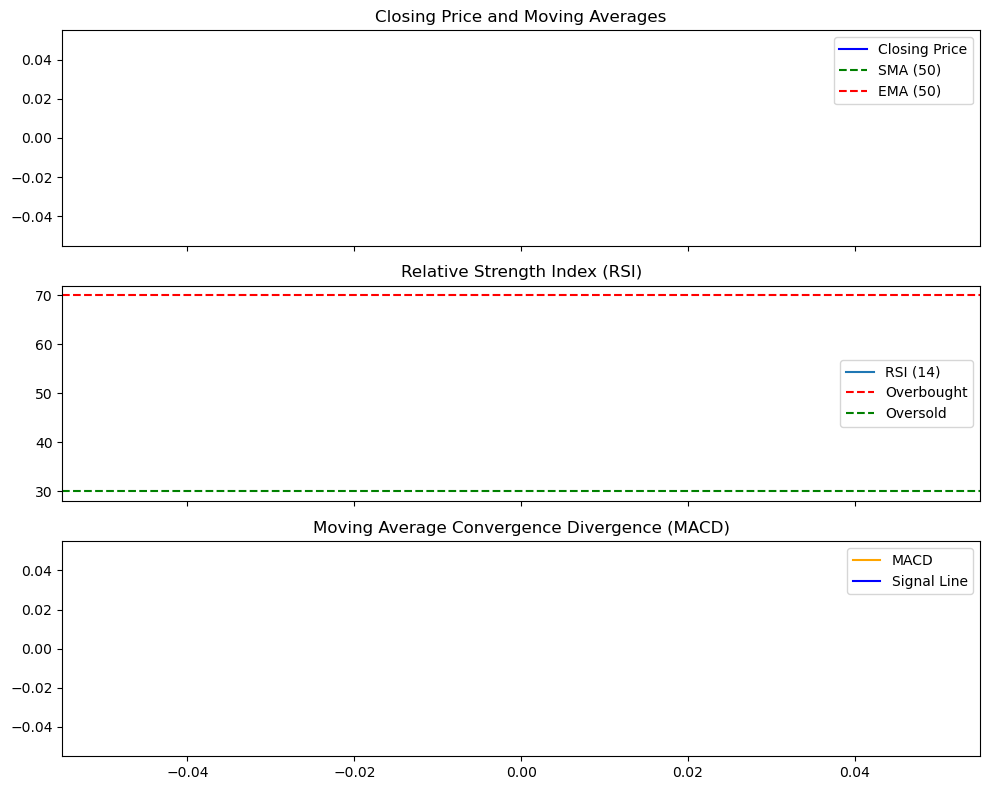

In [9]:
# Load stock data
stock_data = load_stock_data(stock_data_dir)  # Load data from the specified directory

# Check if data was successfully loaded
if stock_data:
    # Choose a stock symbol for analysis
    stock_symbol = list(stock_data.keys())[0]  # Take the first stock in the dictionary
    stock_df = stock_data[stock_symbol]  # Get the DataFrame for the selected stock

    # Plot technical indicators and save the output
    plot_technical_indicators(stock_df, stock_symbol)
else:
    print("No stock data available for analysis.")